In [2]:
#from sympy import *
#from sympy.physics.mechanics import *
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import animation

# Position Control

Eigenvalues: -1.38, -3.62


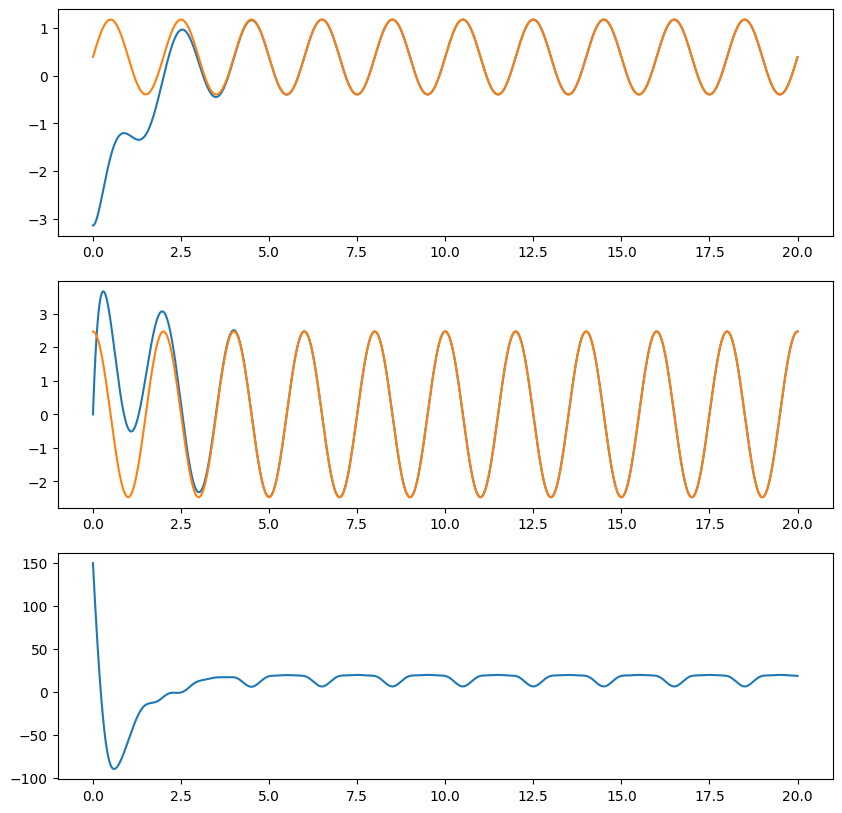

In [2]:
m = 5
l = 1
g = 9.81

K1 = 5
K2 = 5
eigenvalues = np.linalg.eigvals(np.array([[0, 1], [-K1, -K2]]))
print(f'Eigenvalues: {eigenvalues[0]:.2f}, {eigenvalues[1]:.2f}')

dt = 0.001
tf = 20
t = np.arange(0, tf, dt)

theta_d = lambda t: np.pi/4*np.sin(np.pi*t)+np.pi/8
theta_d_dot = lambda t: np.pi**2/4*np.cos(np.pi*t)
theta_d_ddot = lambda t: -np.pi**3/4*np.sin(np.pi*t)

theta_0 = -np.pi
theta_dot_0 = 0

def ode(t, y):
    theta, theta_dot = y
    u = -K1*(theta-theta_d(t)) - K2*(theta_dot-theta_d_dot(t)) + theta_d_ddot(t)
    tau = m*g*l*np.sin(theta) + m*l**2*u
    theta_ddot = (tau - m*g*l*np.sin(theta)) / (m*l**2)
    return [theta_dot, theta_ddot]

sol = solve_ivp(ode, [0, tf], [theta_0, theta_dot_0], t_eval=t)
theta, theta_dot = sol.y

tau = m*g*l*np.sin(theta) + m*l**2*(-K1*(theta-theta_d(t)) - K2*(theta_dot-theta_d_dot(t)) + theta_d_ddot(t))

plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
plt.plot(t, theta)
plt.plot(t, theta_d(t))

plt.subplot(3,1,2)
plt.plot(t, theta_dot)
plt.plot(t, theta_d_dot(t))

plt.subplot(3,1,3)
plt.plot(t, tau)
plt.show()

In [22]:
p = lambda th: (l*np.sin(th), -l*np.cos(th))

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-3, 1), aspect='equal')
ax.grid()

(x_0, y_0) = p(0)
line = ax.plot([0, x_0], [0, y_0], 'o-', lw=2)[0]

(x_d_1, y_d_1) = p(-np.pi/8)
(x_d_2, y_d_2) = p(3*np.pi/8)
ax.plot([x_d_1, 0, x_d_2], [y_d_1, 0, y_d_2], 'k--', lw=1)[0]

text = ax.text(0.05, 0.9, f'time: {t[0]:.1f} s\ntau: {tau[0]:.1f} Nm', transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.5))

fps = 30
def animate(i):
    i = int(i/(fps*dt))
    (x, y) = p(theta[i])
    line.set_data([0, x], [0, y])
    text.set_text(f'time: {t[i]:.1f} s\ntau: {tau[i]:.1f} Nm')

ani = animation.FuncAnimation(fig, animate, frames=fps*tf)
ffmpeg_writer = animation.FFMpegWriter(fps=fps)
ani.save(f'torque_position_control.mp4', writer=ffmpeg_writer)
plt.close(fig)

# Position Synchronization

Eigenvalues: -0.50+0.87j, -0.50-0.87j
0
Work: -48.40462965392696 -48.40462603957003
K1: 1
E_ss: -25.554946870794428
1
Work: -31.795759310589148 -31.79575320232636
K1: 1.3
E_ss: -8.946076527456615
2
Work: -20.062961728213782 -20.0629524754615
K1: 1.6
E_ss: 2.7867210549187504
3
Work: -14.502248160623559 -14.502235112798397
K1: 1.9000000000000001
E_ss: 8.347434622508974
4
Work: -13.24659442092389 -13.24657692744331
K1: 2.2
E_ss: 9.603088362208643
5
Work: -13.881230590883765 -13.881208001164662
K1: 2.5
E_ss: 8.968452192248767
6
Work: -15.18309194974971 -15.183063613210475
K1: 2.8
E_ss: 7.666590833382823
7
Work: -16.672942930908103 -16.672908196967708
K1: 3.0999999999999996
E_ss: 6.176739852224429
8
Work: -18.187044157088703 -18.18700237516693
K1: 3.3999999999999995
E_ss: 4.6626386260438295
9
Work: -19.67366035078707 -19.67361087030448
K1: 3.6999999999999993
E_ss: 3.176022432345462
10
Work: -21.116017316276597 -21.115959486655566
K1: 3.999999999999999
E_ss: 1.7336654668559355
11
Work: -22.5

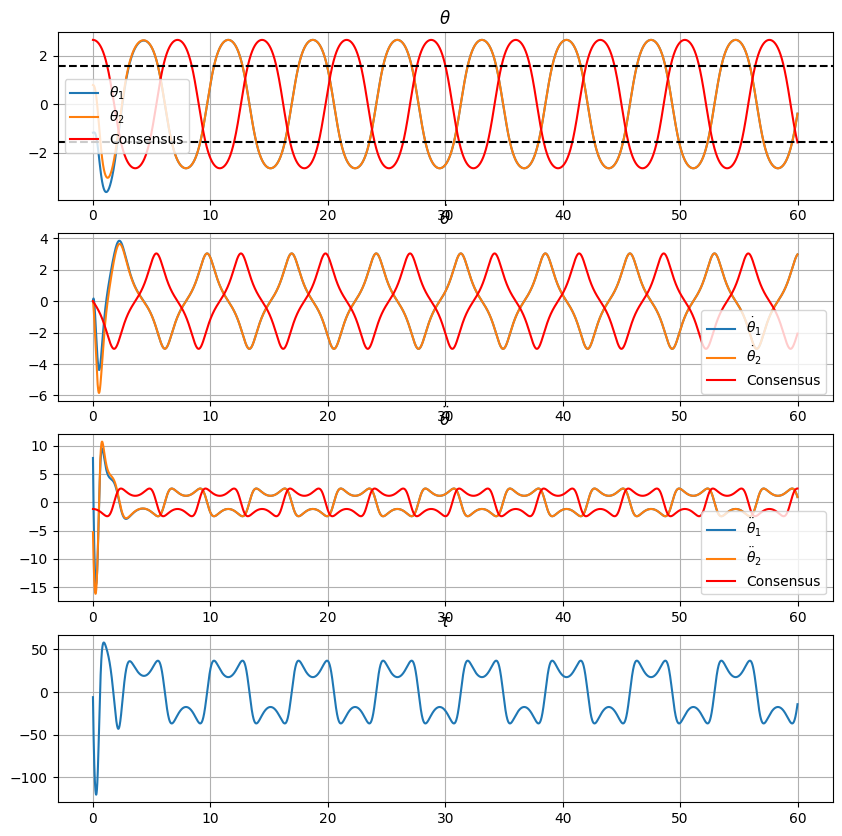

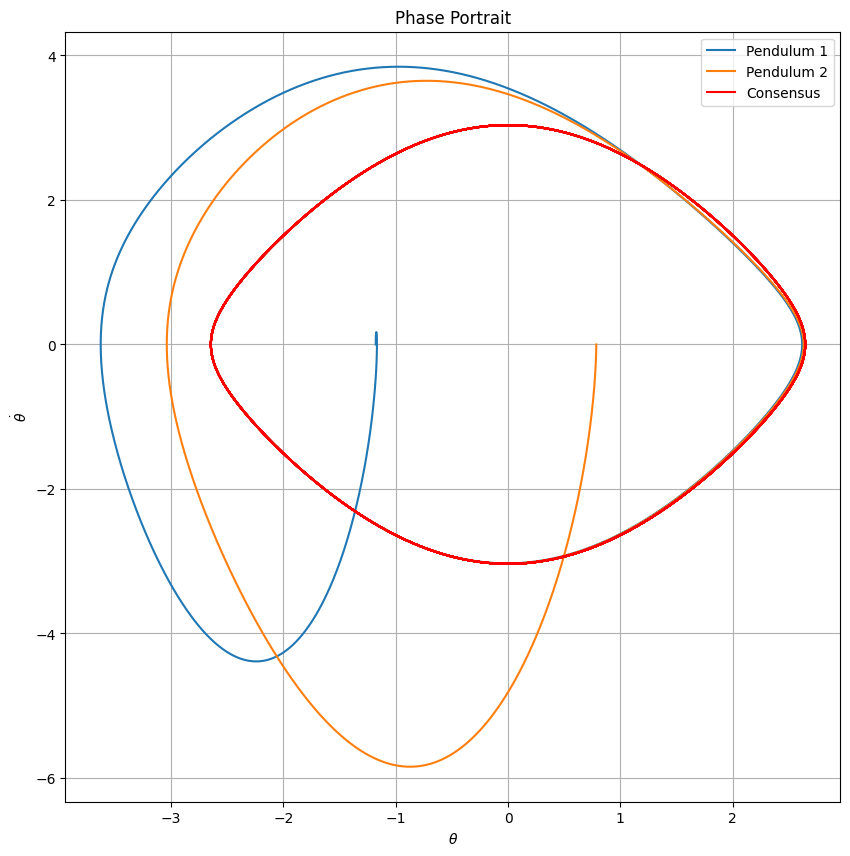

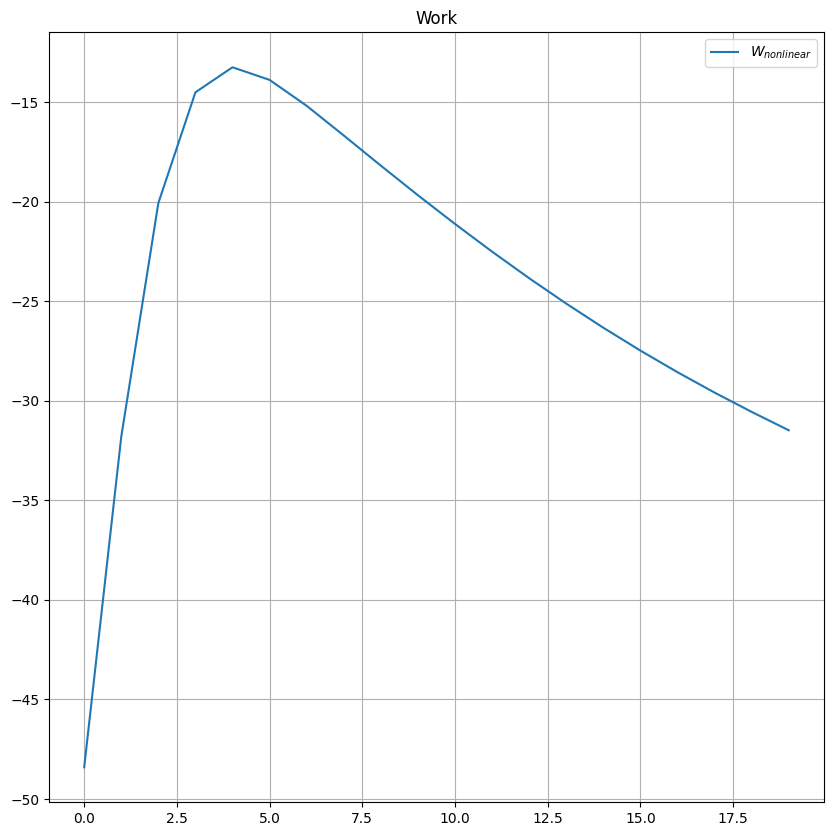

In [32]:
m1 = 5
m2 = 4
l1 = 1
l2 = 1.5
g = 9.81

K1 = 1
K2 = 1
eigenvalues = np.linalg.eigvals(np.array([[0, 1], [-K1, -K2]]))
print(f'Eigenvalues: {eigenvalues[0]:.2f}, {eigenvalues[1]:.2f}')

dt = 0.001
tf = 60
t = np.arange(0, tf, dt)

theta1_0 = -3*np.pi/8
theta1_dot_0 = 0

theta2_0 = np.pi/4
theta2_dot_0 = 0

def ode(t, y):
    theta1, theta1_dot, theta2, theta2_dot = y
    eR = theta1-theta2
    eW = theta1_dot-theta2_dot
    u = -K1*eR - K2*eW
    tau = 1/(1/(m1*l1**2)-1/(m2*l2**2))*(u+g/l1*np.sin(theta1)-g/l2*np.sin(theta2))
    theta1_ddot = (tau - m1*g*l1*np.sin(theta1)) / (m1*l1**2)
    theta2_ddot = (tau - m2*g*l2*np.sin(theta2)) / (m2*l2**2)
    return [theta1_dot, theta1_ddot, theta2_dot, theta2_ddot]

alpha = -(m1*l1-m2*l2)*g/(m1*l1**2-m2*l2**2)
def ode_c(t, y):
    x1, x2 = y
    return [x2, alpha*np.sin(x1)]

iterations = 20
E1_0 = np.empty(iterations)
E2_0 = np.empty(iterations)
W_K1 = np.empty(iterations)
W_K2 = np.empty(iterations)
W_nonlinear = np.empty(iterations)
W_sin = np.empty(iterations)
for i in range(iterations):
    sol = solve_ivp(ode, [0, tf], [theta1_0, theta1_dot_0, theta2_0, theta2_dot_0], t_eval=t, method='DOP853', rtol=1e-10, atol=1e-10)
    theta1, theta1_dot, theta2, theta2_dot = sol.y
    tau = 1/(1/(m1*l1**2)-1/(m2*l2**2))*((-K1*(theta1-theta2) - K2*(theta1_dot-theta2_dot))+g/l1*np.sin(theta1)-g/l2*np.sin(theta2))
    W = np.sum(tau*(theta1_dot-theta2_dot)*dt)
    E1_0[i] = 1/2*m1*l1**2*theta1_dot_0**2 - m1*g*l1*np.cos(theta1_0) # Initial energy of pendulum 1
    E2_0[i] = 1/2*m2*l2**2*theta2_dot_0**2 - m2*g*l2*np.cos(theta2_0) # Initial energy of pendulum 2
    E_ss = E1_0[i]-E2_0[i]+W # Steady state energy

    tau_coeff = 1/(1/(m1*l1**2)-1/(m2*l2**2))
    W_K1[i] = tau_coeff*K1/2*(theta1_0-theta2_0)**2
    W_K2[i] = tau_coeff*np.sum(-K2*(theta1_dot-theta2_dot)**2*dt)
    W_nonlinear[i] = tau_coeff*np.sum((g/l1*np.sin(theta1)-g/l2*np.sin(theta2))*(theta1_dot-theta2_dot)*dt)
    W_sin[i] = tau_coeff*g*(np.cos(theta1_0)/l1+np.cos(theta2_0)/l2)
    E_ss_d = 0
    #K1_p = (E2_0[i]-E1_0[i]-(W_K2[i]+W_nonlinear[i])+E_ss_d)*2/(theta1_0-theta2_0)**2/tau_coeff
    
    print(i)
    print('Work:', W, W_nonlinear[i])
    print('K1:', K1)
    print('E_ss:', E_ss)
    K1 += 0.3
    K2 += 0.3
E_ss = E1_0[0]-E2_0[0]+W_nonlinear[-1]

# Consensus solution
theta_c_0 = np.arccos(-E_ss/(m1*l1-m2*l2)/g)
#theta_c_dot_0 = np.sqrt((E_ss+(m1*l1-m2*l2)*g)/(0.5*(m1*l1**2-m2*l2**2)))
sol = solve_ivp(ode_c, [0, tf], [theta_c_0, 0], t_eval=t, method='DOP853', rtol=1e-10, atol=1e-10)
theta_c, theta_c_dot = sol.y

# Plots
plt.figure(figsize=(10,10))
plt.subplot(4,1,1)
plt.plot(t, theta1, label=r'$\theta_1$')
plt.plot(t, theta2, label=r'$\theta_2$')
plt.plot(t, theta_c, color='red', label='Consensus')
plt.axhline(np.pi/2, color='black', linestyle='--')
plt.axhline(-np.pi/2, color='black', linestyle='--')
plt.title(r'$\theta$')
plt.grid()
plt.legend()

plt.subplot(4,1,2)
plt.plot(t, theta1_dot, label=r'$\dot{\theta}_1$')
plt.plot(t, theta2_dot, label=r'$\dot{\theta}_2$')
plt.plot(t, theta_c_dot, color='red', label='Consensus')
plt.title(r'$\dot{\theta}$')
plt.grid()
plt.legend()

plt.subplot(4,1,3)
plt.plot(t, (tau - m1*g*l1*np.sin(theta1)) / (m1*l1**2), label=r'$\ddot{\theta}_1$')
plt.plot(t, (tau - m2*g*l2*np.sin(theta2)) / (m2*l2**2), label=r'$\ddot{\theta}_2$')
plt.plot(t, alpha*np.sin(theta_c), color='red', label='Consensus')
plt.title(r'$\ddot{\theta}$')
plt.grid()
plt.legend()

plt.subplot(4,1,4)
plt.plot(t, tau)
plt.title(r'$\tau$')
plt.grid()

plt.figure(figsize=(10,10))
plt.plot(theta1, theta1_dot, label='Pendulum 1')
plt.plot(theta2, theta2_dot, label='Pendulum 2')
plt.plot(theta_c, theta_c_dot, color='red', label='Consensus')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\dot{\theta}$')
plt.title('Phase Portrait')
plt.legend()
plt.grid()

plt.figure(figsize=(10,10))
#plt.plot(W_K1, label=r'$W_{K1}$')
#plt.plot(W_K2, label=r'$W_{K2}$')
plt.plot(W_nonlinear, label=r'$W_{nonlinear}$')
#plt.plot(W_sin, label=r'$W_{sin}$')
#plt.plot(E1_0, label=r'$E_1(0)$')
#plt.plot(E2_0, label=r'$E_2(0)$')
plt.title('Work')
plt.grid()
plt.legend()

#term1 = np.cumsum(np.sin(theta1)/l1*theta1_dot*dt + np.sin(theta2)/l2*theta2_dot*dt)
#term2 = np.cumsum(np.sin(theta1)/l1*theta2_dot*dt + np.sin(theta2)/l2*theta1_dot*dt)
#plt.figure(figsize=(10,10))
#plt.plot(t, term1)
#plt.plot(t, term2)
#plt.plot(t, -(1/l1+1/l2)*np.cos(theta1))
#plt.plot(t, np.sin(theta1)/l1*theta2/2+np.sin(theta2)/l2*theta1/2-term2)

#plt.plot(t, -(1/l1+1/l2)*np.cos(theta1)+np.cos(theta1[0])/l1+np.cos(theta2[0])/l2) # analytic term1
#missing = term2+(1/l1+1/l2)*np.cos(theta1)
#print('missing:', missing[-1], np.cos(theta1[0])/l2+np.cos(theta2[0])/l1)
#plt.plot(t, missing)
#plt.plot(t, term1-term2)
#plt.axhline(np.cos(theta1[0])/l1+np.cos(theta2[0])/l2-(1/l1+1/l2)*np.cos(theta1[-1]), np.cos(theta1[0])/l2+np.cos(theta2[0])/l1-(1/l1+1/l2)*np.cos(theta1[-1]))
#print(term1[-1], term2[-1])
#print(np.cos(theta1[0])/l1+np.cos(theta2[0])/l2-(1/l1+1/l2)*np.cos(theta1[-1]), np.cos(theta1[0])/l2+np.cos(theta2[0])/l1-(1/l1+1/l2)*np.cos(theta1[-1]))

In [5]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-3, 1), aspect='equal')
ax.grid()

# Plot initial position
line1 = ax.plot([0, l1*np.sin(theta1[0])], [0, -l1*np.cos(theta2[0])], 'o-', lw=2)[0]
line2 = ax.plot([0, l2*np.sin(theta2[0])], [0, -l2*np.cos(theta2[0])], 'o-', lw=2)[0]

# Text box for time and torque
text = ax.text(0.05, 0.9, f'time: {t[0]:.1f} s\ntau: {tau[0]:.1f} Nm', transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.5))

fps = 30
def animate(i):
    i = int(i/(fps*dt))
    line1.set_data([0, l1*np.sin(theta1[i])], [0, -l1*np.cos(theta1[i])])
    line2.set_data([0, l2*np.sin(theta2[i])], [0, -l2*np.cos(theta2[i])])
    text.set_text(f'time: {t[i]:.1f} s\ntau: {tau[i]:.1f} Nm')

tf_sim = 10
ani = animation.FuncAnimation(fig, animate, frames=fps*tf_sim)
ffmpeg_writer = animation.FFMpegWriter(fps=fps)
ani.save(f'torque_sync.mp4', writer=ffmpeg_writer)
plt.close(fig)